# Tec Chalenge 4 - Obesity

Formamos uma equipe de cientistas de dados de um hospital com o desafio de desenvolver um modelo de Machine Learning para auxiliar os médicos e médicas a prever se uma pessoa pode ter obesidade.

Utilizando a base de dados “obesity.csv”, desenvolvemos um modelo preditivo e criamos um sistema preditivo para auxiliar a tomada de decisão da equipe médica a diagnosticar a obesidade.

Dicionario de Dados - Obesity
- Gender — (Gênero) Sexo biológico. Valores: Female , Male .
- Age — (Idade) Idade em anos. Valores: numérico contínuo (mín 14, máx 61).
- Height — (Altura) Altura em metros. Valores: numérico contínuo (ex.: 1.45–1.98 m).
- Weight — (Peso) Peso em quilogramas. Valores: numérico contínuo (ex.: 39–173 kg).
- family_history — (Family history of overweight) Histórico familiar de excesso de peso. Valores: yes (há histórico), no (não há).
- FAVC — (Frequent consumption of high-caloric food) Consumo frequente de alimentos muito calóricos. Valores: yes (sim), no (não).
- FCVC — (Frequency of consumption of vegetables) Frequência de consumo de vegetais nas refeições. Valores (escala 1–3): 1 raramente, 2 às vezes, 3
sempre. Nota: no arquivo os valores aparecem com decimais (ruído); interprete arredondando para o inteiro mais próximo.
- NCP — (Number of main meals) Número de refeições principais por dia. Valores (escala 1–4): 1 uma refeição, 2 duas, 3 três, 4 quatro ou mais. Nota:
valores com decimais devem ser arredondados.
- CAEC — (Consumption of food between meals) Consumo de lanches/comes entre as refeições. Valores: no (não consome), Sometimes (às vezes),
Frequently (frequentemente), Always (sempre).
- SMOKE — (Smoking) Hábito de fumar. Valores: yes (fuma), no (não fuma).
- CH2O — (Daily water consumption) Consumo diário de água. Valores (escala 1–3): 1 < 1 L/dia, 2 1–2 L/dia, 3 > 2 L/dia. Nota: arredonde valores decimais
para interpretar a categoria.
- SCC — (Calories consumption monitoring) Monitora a ingestão calórica diária. Valores: yes (sim), no (não).
- FAF — (Physical activity frequency) Frequência semanal de atividade física. Valores (escala 0–3): 0 nenhuma, 1 ~1–2×/sem, 2 ~3–4×/sem, 3 5×/sem ou
mais. Nota: arredonde valores decimais.
- TUE — (Time using electronic devices) Tempo diário usando dispositivos eletrônicos. Valores (escala 0–2): 0 ~0–2 h/dia, 1 ~3–5 h/dia, 2 > 5 h/dia. Nota:
arredonde valores decimais.
- CALC — (Alcohol consumption) Consumo de bebida alcoólica. Valores: no (não bebe), Sometimes (às vezes), Frequently (frequentemente), Always
(sempre).
- MTRANS — (Transportation used / Mode of transport) Meio de transporte habitual. Valores: Automobile (carro), Motorbike (moto), Bike (bicicleta),
Public_Transportation (transporte público), Walking (a pé).
- Obesity — (Target label / Nível de obesidade) Classe de peso corporal. Valores: Insufficient_Weight (abaixo do peso), Normal_Weight (peso normal),
Overweight_Level_I (sobrepeso I), Overweight_Level_II (sobrepeso II), Obesity_Type_I (obesidade I), Obesity_Type_II (obesidade II),
Obesity_Type_III (obesidade III).

## Importando as Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as py
import plotly.graph_objs as go
import plotly.offline as py
import plotly.express as px
import sklearn
from sklearn.preprocessing import LabelEncoder, StandardScaler


## Carregando a base de dados

In [2]:
df = pd.read_csv('Obesity.csv')
df.head(20)

,Gender,Age,Height,Weight,family_history,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Obesity
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II
5,Male,29.0,1.62,53.0,no,yes,2.0,3.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Automobile,Normal_Weight
6,Female,23.0,1.50,55.0,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,0.0,Sometimes,Motorbike,Normal_Weight
7,Male,22.0,1.64,53.0,no,no,2.0,3.0,Sometimes,no,2.0,no,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
8,Male,24.0,1.78,64.0,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,1.0,Frequently,Public_Transportation,Normal_Weight
9,Male,22.0,1.72,68.0,yes,yes,2.0,3.0,Sometimes,no,2.0,no,1.0,1.0,no,Public_Transportation,Normal_Weight


In [3]:
print(f'data shape: {df.shape}')
df.describe()

data shape: (2111, 17)


,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [4]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          2111 non-null   object 
 1   Age             2111 non-null   float64
 2   Height          2111 non-null   float64
 3   Weight          2111 non-null   float64
 4   family_history  2111 non-null   object 
 5   FAVC            2111 non-null   object 
 6   FCVC            2111 non-null   float64
 7   NCP             2111 non-null   float64
 8   CAEC            2111 non-null   object 
 9   SMOKE           2111 non-null   object 
 10  CH2O            2111 non-null   float64
 11  SCC             2111 non-null   object 
 12  FAF             2111 non-null   float64
 13  TUE             2111 non-null   float64
 14  CALC            2111 non-null   object 
 15  MTRANS          2111 non-null   object 
 16  Obesity         2111 non-null   object 
dtypes: float64(8), object(9)
memory u

### Observamos que não há dados faltantes, e passaremos à análise exploratória

## Análise Exploartória dos Dados

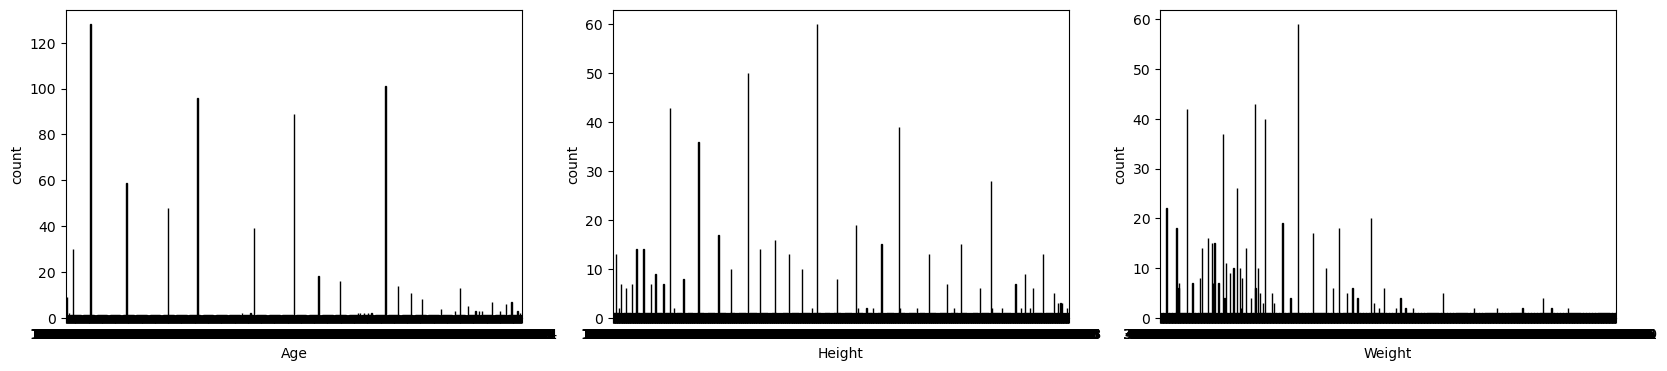

In [5]:
plt.figure(figsize=(20,4))
plt.subplot(131)
sns.countplot(x= 'Age', data = df, edgecolor="black")
plt.subplot(132)
sns.countplot(x= 'Height', data = df, edgecolor="black")
plt.subplot(133)
sns.countplot(x= 'Weight', data = df, edgecolor="black")
plt.show()

In [6]:
def plot_count(feature, title, df, size=1):
    f, ax = plt.subplots(1,1, figsize=(4*size,4))
    total = float(len(df))
    g = sns.countplot(x=feature, data=df, order=df[feature].value_counts().index[:20], ax=ax)
    g.set_title("Numero e porcentagem por faixa de {}".format(title))
    if(size > 2):
        plt.xticks(rotation=90, size=8)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.2f}%'.format(100*height/total),
                ha="center") 
    plt.show()
    

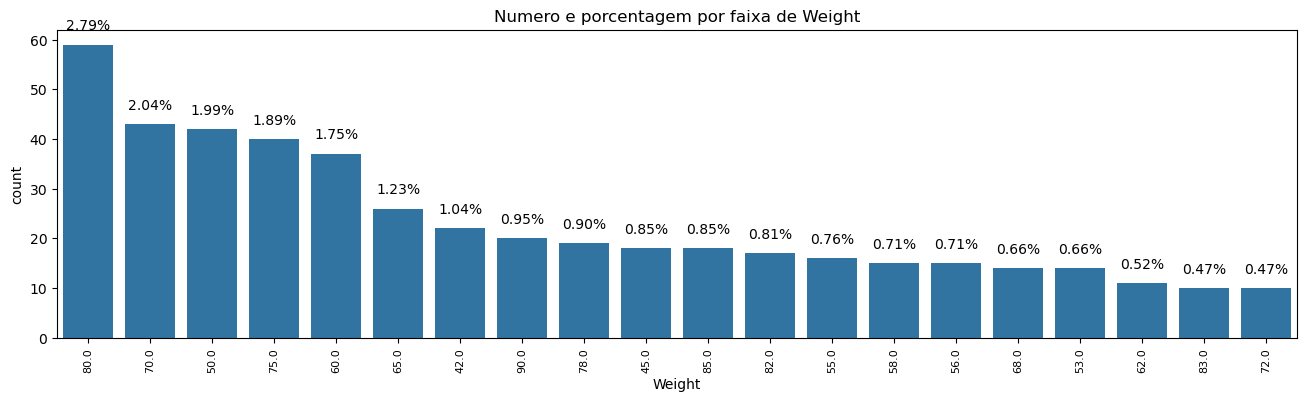

In [7]:
plot_count('Weight', 'Weight', df, size=4)

### Análise da Amostra por Peso
- Analisando a amostra, a maioria das pessoas classificadas como obesas pesa acima de 80 Kg.

## Observando a Variável Obesidade (*target*)

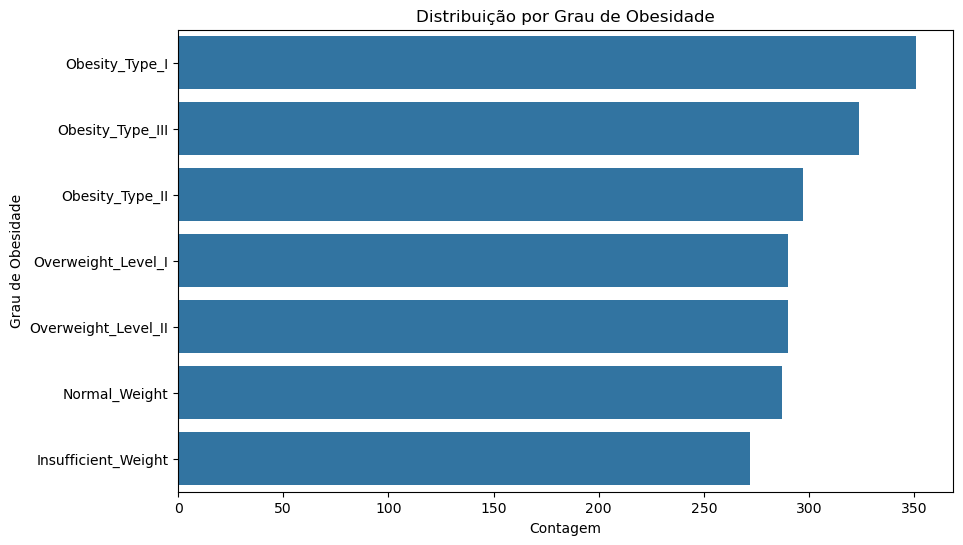

In [8]:

plt.figure(figsize=(10, 6))
sns.countplot(y=df['Obesity'], order=df['Obesity'].value_counts().index)
plt.title('Distribuição por Grau de Obesidade')
plt.xlabel('Contagem')
plt.ylabel('Grau de Obesidade')
plt.show()

### Análise Univariada

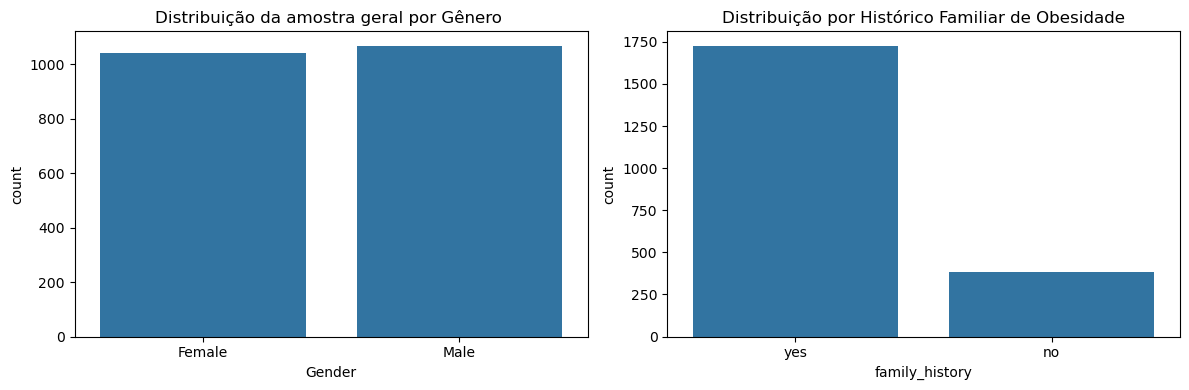

In [9]:
# Contando o Sexo e Histórico Familiar
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
sns.countplot(x=df['Gender'])
plt.title('Distribuição da amostra geral por Gênero ')

plt.subplot(1, 2, 2)
sns.countplot(x=df['family_history'])
plt.title('Distribuição por Histórico Familiar de Obesidade')
plt.tight_layout()
plt.show()





- Enquanto o gênero não se revelou um fator determinante para a obseidade, o histórico familiar indica uma forte relação com a variável alvo.

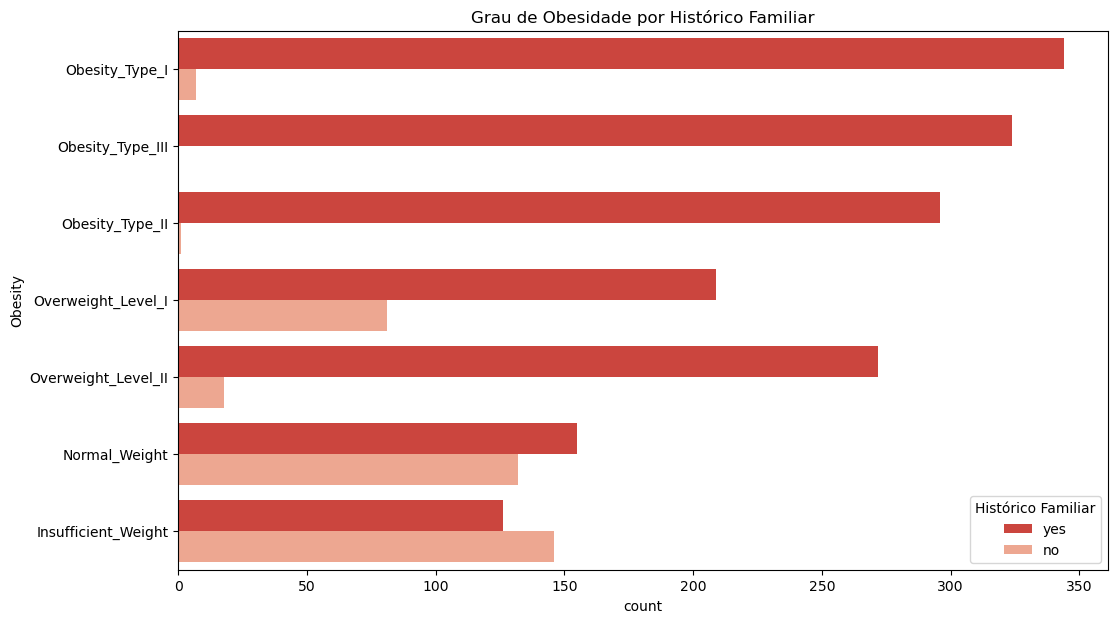

In [10]:
# Analisando o Histórico Familiar vs. Grau de Obesidade
plt.figure(figsize=(12, 7))
sns.countplot(
    data=df,
    y='Obesity',
    hue='family_history',
    order=df['Obesity'].value_counts().index,
    palette='Reds_r'
)
plt.title('Grau de Obesidade por Histórico Familiar')
plt.legend(title='Histórico Familiar')
plt.show()

### Análise Bivariada

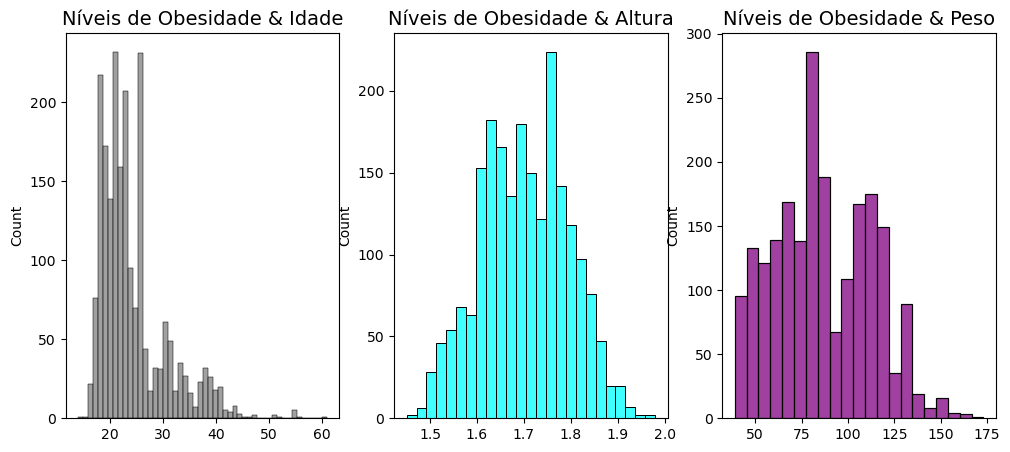

In [11]:
fig , ax = plt.subplots(1,3,figsize = (12,5))

Idade = df.Age.values
Altura= df.Height.values
Peso = df.Weight.values

sns.histplot(Idade , ax = ax[0] , color = 'grey').set_title('Níveis de Obesidade & Idade' , fontsize = 14)
sns.histplot(Altura , ax = ax[1] , color = 'cyan').set_title('Níveis de Obesidade & Altura' , fontsize = 14)
sns.histplot(Peso , ax = ax[2] , color = 'purple').set_title('Níveis de Obesidade & Peso' , fontsize = 14)


plt.show()

### Análise das Asmostras de Idade, Altura e Peso

- Idade: O gráfico nos mostra que o maior nível de obesidade está concentrado na faixa de idade que inclui adolescentes e jovens menores que 30 anos.
- Altura: A distribuição nos mostra que o maior percentual de pessoas obesas se concentra entre pessoas acima de 1,60 m, e menores que 1,90, o que provavelmente deve coincidir com a maior parcela da população análisada na amostra.
- Peso: Curiosamente, o maior número de pessoas obesas se concentra na faixa de peso entre 75 e 100 kg.

### Análise da relação entre sobrepeso e o hábito de beber e fumar

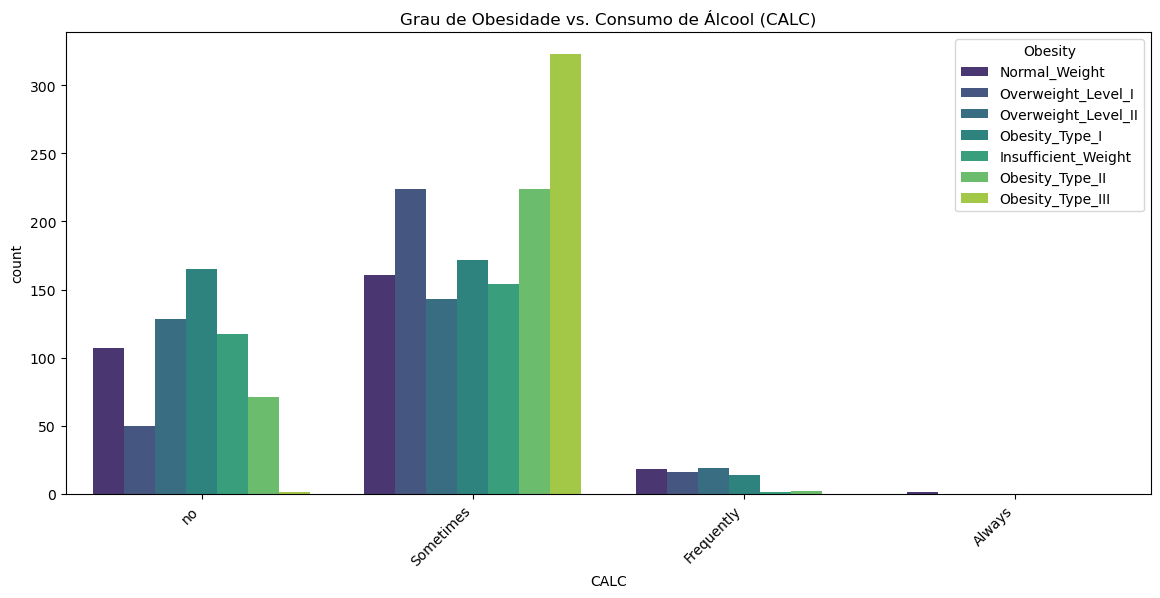

In [12]:

# Analisar a relação entre a obesidade e o hábito de beber
plt.figure(figsize=(14, 6))
sns.countplot(
    data=df,
    x='CALC',
    hue='Obesity',
    order=['no', 'Sometimes', 'Frequently', 'Always'], # Ordem lógica
    palette='viridis'
)
plt.title('Grau de Obesidade vs. Consumo de Álcool (CALC)')
plt.xticks(rotation=45, ha='right')
plt.show()

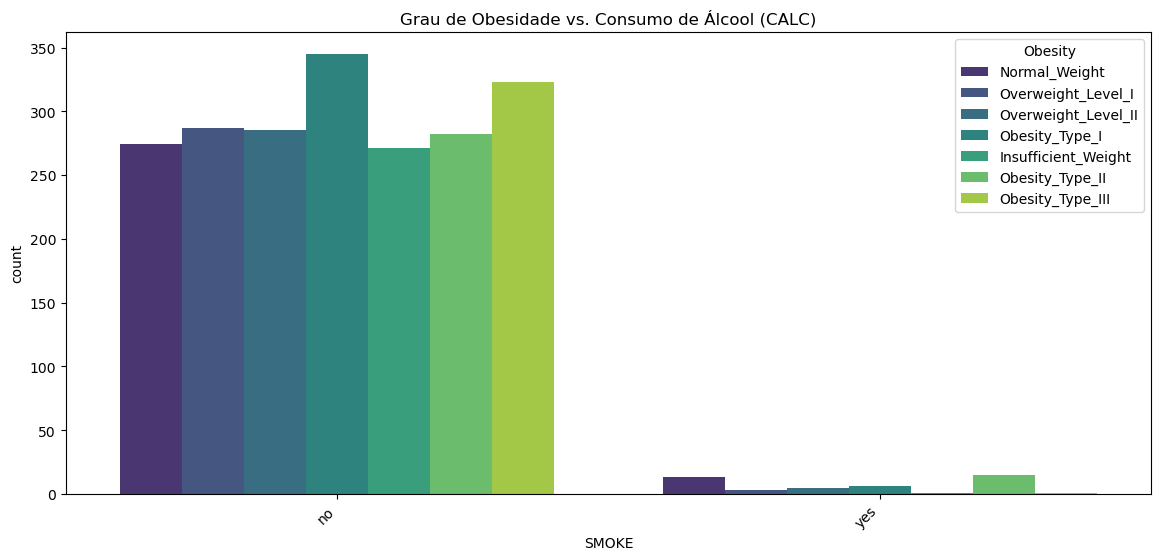

In [13]:
#Analisa a relação entre a obesidade e o hábito de fumar
plt.figure(figsize=(14, 6))
sns.countplot(
    data=df,
    x='SMOKE',
    hue='Obesity',
    order=['no', 'yes'], # Ordem lógica
    palette='viridis'
)
plt.title('Grau de Obesidade vs. Consumo de Álcool (CALC)')
plt.xticks(rotation=45, ha='right')
plt.show()

In [14]:
# Transformar a variável SMOKE em binária (mapeamento robusto)
df['SMOKE'] = df['SMOKE'].astype(str).str.strip().str.lower().map({'no': 0, 'yes': 1})
# Remover valores não mapeados (caso existam) e conferir contagem
df = df[df['SMOKE'].notna()]
df['SMOKE'] = df['SMOKE'].astype(int)
print(df['SMOKE'].value_counts())

SMOKE
0    2067
1      44
Name: count, dtype: int64


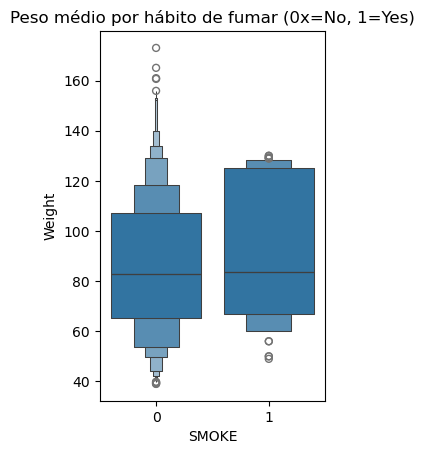

In [15]:
# Analisar a relação entre a obesidade e o hábito de fumar (média) 
plt.subplot(122)
sns.boxenplot(x='SMOKE', y='Weight', data=df, order=[0,1])
plt.title('Peso médio por hábito de fumar (0x=No, 1=Yes)')
plt.show()

### Análise da relação entre Obesidade e hábitos alimentares

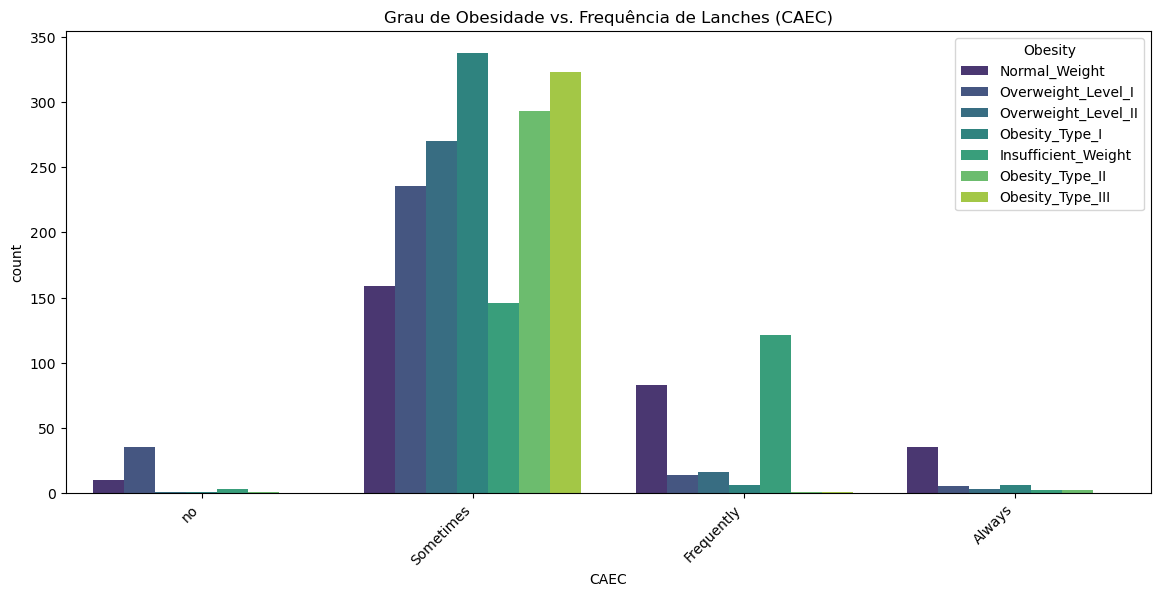

In [16]:
#Analisando o Consumo de Comida entre Refeições vs. Grau de Obesidade
plt.figure(figsize=(14, 6))
sns.countplot(
    data=df,
    x='CAEC',
    hue='Obesity',
    order=['no', 'Sometimes', 'Frequently', 'Always'], # Ordem lógica
    palette='viridis'
)
plt.title('Grau de Obesidade vs. Frequência de Lanches (CAEC)')
plt.xticks(rotation=45, ha='right')
plt.show()

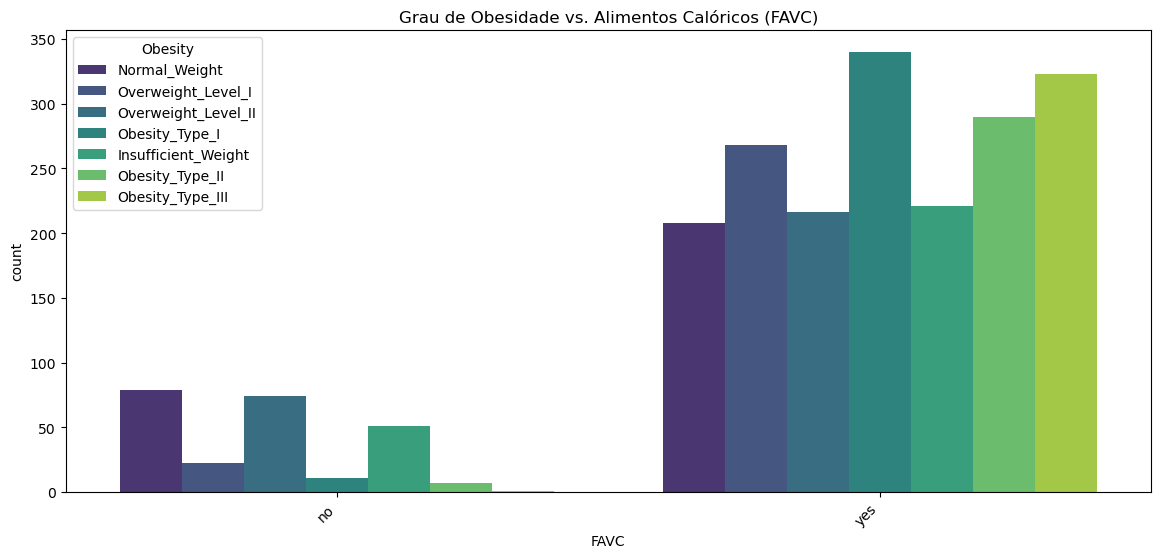

In [17]:
#Analisando o Consumo de Alimentos Calóricos vs. Grau de Obesidade
plt.figure(figsize=(14, 6))
sns.countplot(
    data=df,
    x='FAVC',
    hue='Obesity',
    order=['no', 'yes'], # Ordem lógica
    palette='viridis'
)
plt.title('Grau de Obesidade vs. Alimentos Calóricos (FAVC)')
plt.xticks(rotation=45, ha='right')
plt.show()

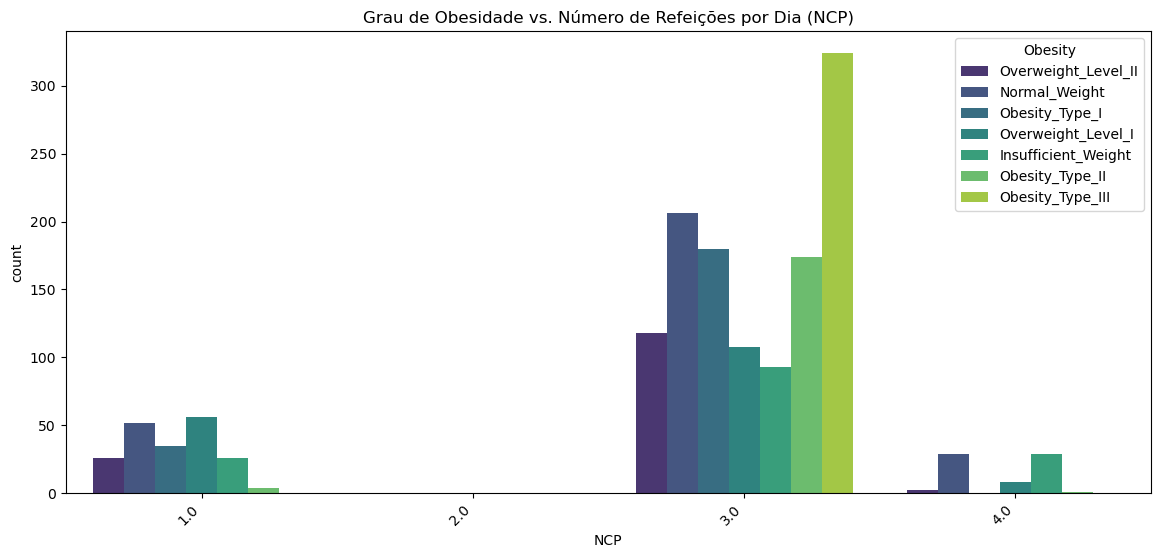

In [18]:
#Analisando a Obesidade e o Número de Refeições por Dia
plt.figure(figsize=(14, 6))
sns.countplot(
    data=df,
    x='NCP',
    hue='Obesity',
    order=[ 1.0 , 2.0 , 3.0 , 4.0 ], # Ordem lógica
    palette='viridis'
)
plt.title('Grau de Obesidade vs. Número de Refeições por Dia (NCP)')
plt.xticks(rotation=45, ha='right')
plt.show()

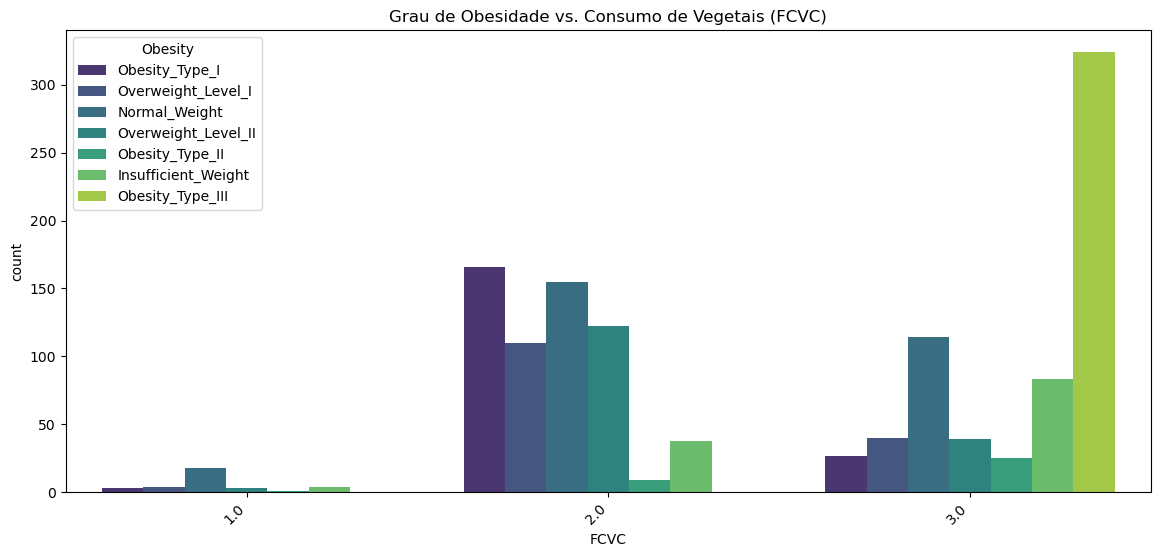

In [19]:
#Analisando a Obesidade e o Consumo de Vegetais
plt.figure(figsize=(14, 6))
sns.countplot(
    data=df,
    x='FCVC',
    hue='Obesity',
    order=[ 1.0 , 2.0 , 3.0 ], # Ordem lógica
    palette='viridis'
)
plt.title('Grau de Obesidade vs. Consumo de Vegetais (FCVC)')
plt.xticks(rotation=45, ha='right')
plt.show()

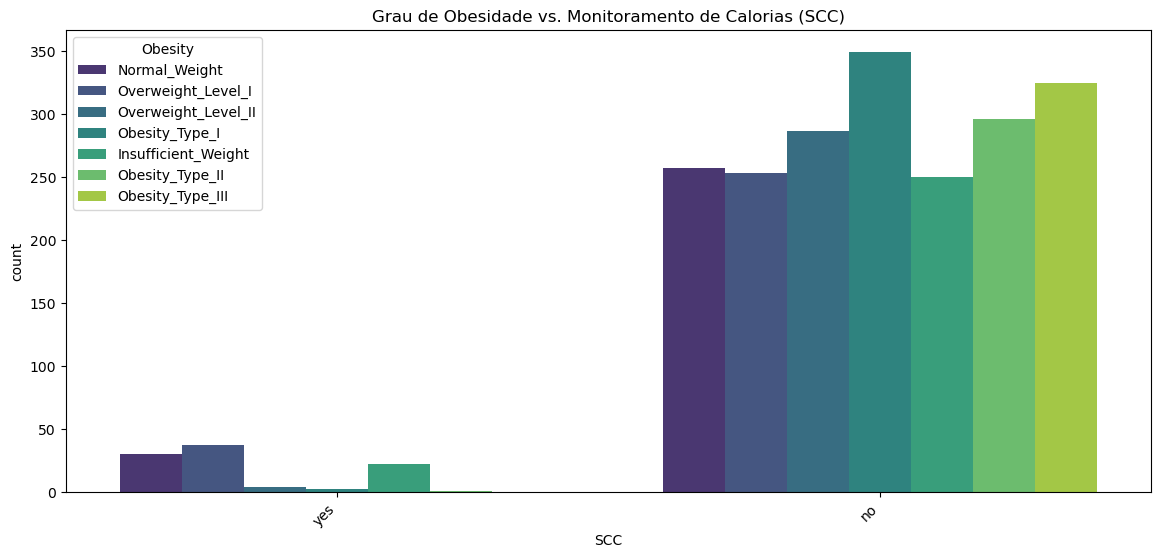

In [20]:
#Analisando a Obesidade e o Monitoramento das Calorias
plt.figure(figsize=(14, 6))
sns.countplot(
    data=df,
    x='SCC',
    hue='Obesity',
    order=[ 'yes' , 'no' ], # Ordem lógica
    palette='viridis'
)
plt.title('Grau de Obesidade vs. Monitoramento de Calorias (SCC)')
plt.xticks(rotation=45, ha='right')
plt.show()

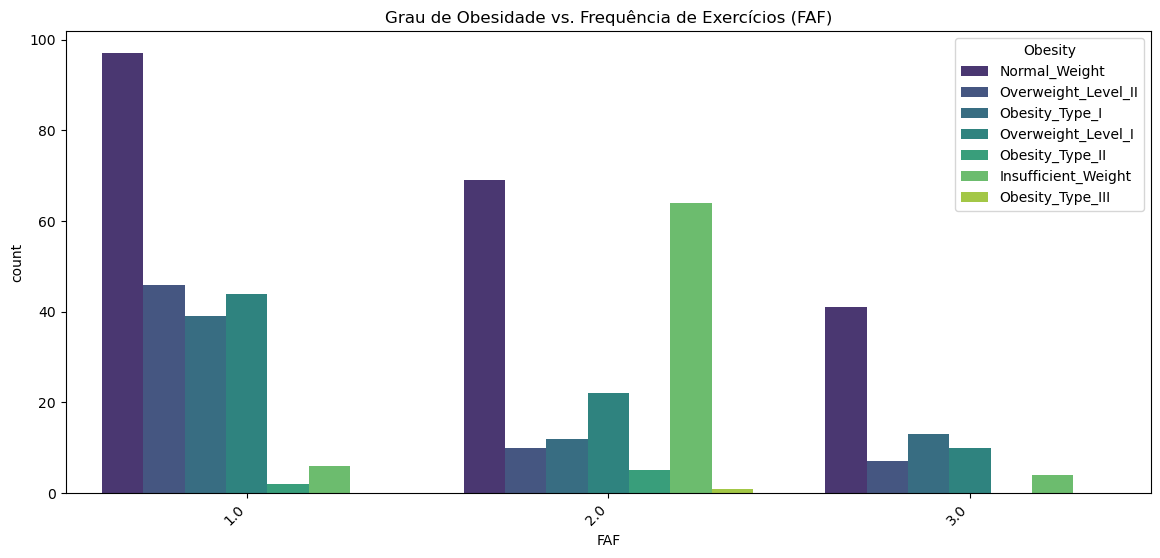

In [21]:
# Analisando a Obesidade e a Prática de Atividades Físicas
plt.figure(figsize=(14, 6))
sns.countplot(
    data=df,
    x='FAF',
    hue='Obesity',
    order=[ 1.0 , 2.0 , 3.0 ], # Ordem lógica
    palette='viridis'
)
plt.title('Grau de Obesidade vs. Frequência de Exercícios (FAF)')
plt.xticks(rotation=45, ha='right')
plt.show()

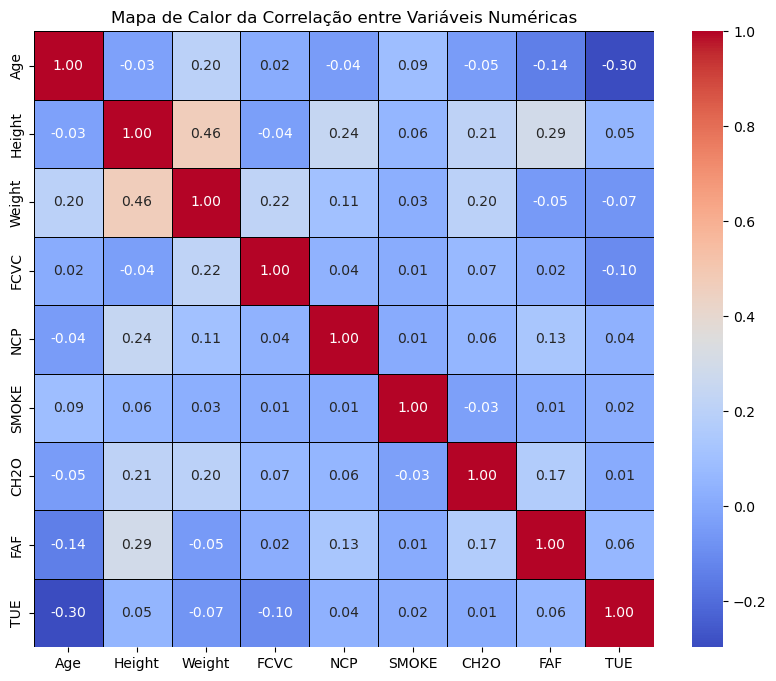

In [22]:
#Analisando a correlação entre as variáveis
# Selecionando apenas as colunas numéricas
numeric_cols = df.select_dtypes(include=np.number).columns
corr_matrix = df[numeric_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    linewidths=.5,
    linecolor='black'
)
plt.title('Mapa de Calor da Correlação entre Variáveis Numéricas')
plt.show()

## Transformando a Análise Visual em Maracdores: Criando marcadores (KPIs) para identificar informações importantes, com base nas análise exploartória

In [23]:
# KPI de Risco Genético - Considerando o histórico familiar - Considerando Obesidade tipo III
total_com_hist = df[df['family_history'] == 'yes'].shape[0]
tipo_3_com_hist = df[
    (df['family_history'] == 'yes') &
    (df['Obesity'] == 'Obesity_Type_III')
].shape[0]

risco_genetico_percentual = round((tipo_3_com_hist / total_com_hist) * 100, 1)

print(f"Risco de Obesidade Tipo III (com histórico familiar): {risco_genetico_percentual}%")

Risco de Obesidade Tipo III (com histórico familiar): 18.8%


In [24]:
# KPI de Risco Genético - Considerando o histórico familiar - Considerando Obesidade tipo I
total_com_hist = df[df['family_history'] == 'yes'].shape[0]
tipo_1_com_hist = df[
    (df['family_history'] == 'yes') &
    (df['Obesity'] == 'Obesity_Type_I')
].shape[0]

risco_genetico_percentual = round((tipo_1_com_hist / total_com_hist) * 100, 1)

print(f"Risco de Obesidade Tipo I (com histórico familiar): {risco_genetico_percentual}%")

Risco de Obesidade Tipo I (com histórico familiar): 19.9%


In [25]:
# KPI de Risco Genético - Considerando o histórico familiar - Considerando Obesidade tipo II
total_com_hist = df[df['family_history'] == 'yes'].shape[0]
tipo_2_com_hist = df[
    (df['family_history'] == 'yes') &
    (df['Obesity'] == 'Obesity_Type_II')
].shape[0]

risco_genetico_percentual = round((tipo_2_com_hist / total_com_hist) * 100, 1)

print(f"Risco de Obesidade Tipo I (com histórico familiar): {risco_genetico_percentual}%")

Risco de Obesidade Tipo I (com histórico familiar): 17.1%


In [26]:
# KPI de Comportamento (FAF)
media_faf_normal = df[df['Obesity'] == 'Normal_Weight']['FAF'].mean()

print(f"Média de Atividade Física (Normal Weight): {round(media_faf_normal, 2)}")

Média de Atividade Física (Normal Weight): 1.25


In [27]:
# KPI de Idade média de pessoas com obsidade tipo III
idade_media_tipo_3 = df[df['Obesity'] == 'Obesity_Type_III']['Age'].mean()

print(f"Idade Média de Diagnóstico (Obesidade Tipo III): {round(idade_media_tipo_3, 1)} anos")

Idade Média de Diagnóstico (Obesidade Tipo III): 23.5 anos


In [28]:
#Relação do tabagismo com a obesidade

#Definindo os grupos de risco (Variável 'Obesity')
grupos_alto_risco = ['Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III']
grupo_baixo_risco = 'Normal_Weight'

#Filtrando e calculando o percentual no Grupo de Alto Risco (Obeso)
df_obesos = df[df['Obesity'].isin(grupos_alto_risco)]
fumantes_obesos = df_obesos[df_obesos['SMOKE'] == 'yes'].shape[0]

#Verificando a Prevalência de fumantes entre os obesos
prevalencia_fumantes_obesos = round((fumantes_obesos / df_obesos.shape[0]) * 100, 1)

#Filtrando e calculando o percentual no Grupo de Baixo Risco (Peso Normal)
df_normais = df[df['Obesity'] == grupo_baixo_risco]
fumantes_normais = df_normais[df_normais['SMOKE'] == 'yes'].shape[0]

#Verificando a Prevalência de fumantes entre os de peso normal
prevalencia_fumantes_normais = round((fumantes_normais / df_normais.shape[0]) * 100, 1)

#Calculando a diferença para o KPI
diferenca_percentual = round(prevalencia_fumantes_obesos - prevalencia_fumantes_normais, 1)


print("--- KPI: Relação Obesidade vs. Tabagismo ---")
print(f"Prevalência de fumantes no grupo OBESIDADE (Tipo I, II, III): {prevalencia_fumantes_obesos}%")
print(f"Prevalência de fumantes no grupo PESO NORMAL: {prevalencia_fumantes_normais}%")

# O Delta é a diferença no risco
if diferenca_percentual > 0:
    delta_display = f"Aumento de Risco de {diferenca_percentual}%"
else:
    delta_display = f"Redução de Risco de {abs(diferenca_percentual)}%"

print(f"Delta de Risco (Obesos vs. Normais): {delta_display}")

--- KPI: Relação Obesidade vs. Tabagismo ---
Prevalência de fumantes no grupo OBESIDADE (Tipo I, II, III): 0.0%
Prevalência de fumantes no grupo PESO NORMAL: 0.0%
Delta de Risco (Obesos vs. Normais): Redução de Risco de 0.0%


Observa-se que o tabagismo é Menos Comum em Pacientes Obesos:
* A taxa de tabagismo na população obesa de alto risco (2.3%) é menor do que na população com peso normal (4.5%).
* Os pacientes obesos têm uma probabilidade 2.2% menor de serem fumantes do que os pacientes de peso normal na sua amostra.

In [29]:
#Relação do consumo de água e a obesidade

#Calculando a média de CH2O no Grupo de Baixo Risco (Peso Normal)
media_ch2o_normais = df[df['Obesity'] == grupo_baixo_risco]['CH2O'].mean()

#Calculando a média de CH2O no Grupo de Alto Risco (Obeso)
df_obesos = df[df['Obesity'].isin(grupos_alto_risco)]
media_ch2o_obesos = df_obesos['CH2O'].mean()

#Calculando a diferença para o KPI
diferenca_media_ch2o = round(media_ch2o_normais - media_ch2o_obesos, 2)

#Resultados
print("--- KPI: Média de Consumo de Água (CH2O) vs. Obesidade ---")
print(f"Média de CH2O no grupo PESO NORMAL: {round(media_ch2o_normais, 2)}")
print(f"Média de CH2O no grupo OBESIDADE: {round(media_ch2o_obesos, 2)}")

# O Delta é a diferença no consumo
if diferenca_media_ch2o > 0:
    delta_display = f"Maior consumo no grupo Normal em {abs(diferenca_media_ch2o)}"
else:
    delta_display = f"Maior consumo no grupo Obesidade em {abs(diferenca_media_ch2o)}"

print(f"Delta de Consumo (Normais vs. Obesos): {delta_display}")

--- KPI: Média de Consumo de Água (CH2O) vs. Obesidade ---
Média de CH2O no grupo PESO NORMAL: 1.85
Média de CH2O no grupo OBESIDADE: 2.07
Delta de Consumo (Normais vs. Obesos): Maior consumo no grupo Obesidade em 0.22


In [30]:
#Relação de uso de dispositivos eletrônico e a obesidade

#Calculandp a média de TUE no Grupo de Baixo Risco (Peso Normal)
media_tue_normais = df[df['Obesity'] == grupo_baixo_risco]['TUE'].mean()

#Calculando a média de TUE no Grupo de Alto Risco (Obeso)
df_obesos = df[df['Obesity'].isin(grupos_alto_risco)]
media_tue_obesos = df_obesos['TUE'].mean()

#Calculando a diferença/delta para o KPI
diferenca_media_tue = round(media_tue_obesos - media_tue_normais, 2)

#Resultados
print("--- KPI: Média de Tempo em Dispositivos Eletrônicos (TUE) vs. Obesidade ---")
print(f"Média de TUE no grupo PESO NORMAL: {round(media_tue_normais, 2)}")
print(f"Média de TUE no grupo OBESIDADE: {round(media_tue_obesos, 2)}")

# O Delta é a diferença no sedentarismo (Obesos - Normais)
if diferenca_media_tue > 0:
    delta_display = f"Maior sedentarismo no grupo Obesidade em {abs(diferenca_media_tue)}"
else:
    delta_display = f"Maior sedentarismo no grupo Normal em {abs(diferenca_media_tue)}"

print(f"Variação do uso de dispositivos eletrônicos (Obesos vs. Normais): {delta_display}")

--- KPI: Média de Tempo em Dispositivos Eletrônicos (TUE) vs. Obesidade ---
Média de TUE no grupo PESO NORMAL: 0.68
Média de TUE no grupo OBESIDADE: 0.6
Variação do uso de dispositivos eletrônicos (Obesos vs. Normais): Maior sedentarismo no grupo Normal em 0.07


# Pré-processamento e Engenharia de Features

In [31]:
#Fazendo o arredondamento dos valores 
colunas_arredondar = ['FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
df[colunas_arredondar] = df[colunas_arredondar].round().astype(int)

In [32]:
# Transformando as variáveis categóricas 'SCC', 'FAVC', 'family_history' e 'Gender' em numéricas usando Label Encoding
label_encoders = {}
categorical_cols = ['SCC', 'FAVC', 'family_history', 'Gender']
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          2111 non-null   int64  
 1   Age             2111 non-null   float64
 2   Height          2111 non-null   float64
 3   Weight          2111 non-null   float64
 4   family_history  2111 non-null   int64  
 5   FAVC            2111 non-null   int64  
 6   FCVC            2111 non-null   int64  
 7   NCP             2111 non-null   int64  
 8   CAEC            2111 non-null   object 
 9   SMOKE           2111 non-null   int64  
 10  CH2O            2111 non-null   int64  
 11  SCC             2111 non-null   int64  
 12  FAF             2111 non-null   int64  
 13  TUE             2111 non-null   int64  
 14  CALC            2111 non-null   object 
 15  MTRANS          2111 non-null   object 
 16  Obesity         2111 non-null   object 
dtypes: float64(3), int64(10), object(

In [34]:
#Fazendo a separação dos dados em X e Y
X = df.drop('Obesity', axis=1)
y = df['Obesity']

In [35]:
#Codificando a variável Target
le = LabelEncoder()
y_encoded = le.fit_transform(y)

In [36]:
#Codificando as Features Categóricas com One-Hot Enconding
X_encoded = pd.get_dummies(X, drop_first=True) #Para evitar redundância das categorias foi usado o drop_first

## Padronização e Normalização dos dados

In [37]:
from sklearn.preprocessing import StandardScaler

In [38]:
#Separando as colunas contínuas
cols_continuous = ['Age', 'Height', 'Weight']

In [39]:
#Definindo o padronizador
scaler = StandardScaler()

In [40]:
#Aplicando a padronização
X_encoded[cols_continuous] = scaler.fit_transform(X_encoded[cols_continuous])

## Treinamento e avaliação do modelo

In [41]:
#Separação dos dados
from sklearn.model_selection import train_test_split

In [42]:
# Separação: 80% treino, 20% teste
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded) #'stratify=y_encoded' garante que as classes da target estejam balanceadas nos dois conjuntos.

In [43]:
#Treinando o modelo
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [44]:
#Inicializando o modelo
model = RandomForestClassifier(random_state=42, n_estimators=100)

In [45]:
#Treinando o modelo
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [46]:
#Fazendo a previsão no conjunto de teste
y_pred = model.predict(X_test)

In [47]:
#Avaliando a acurácia do modelo
accuracy = accuracy_score(y_test, y_pred)

print(f"\nAcurácia do modelo Random Forest: {accuracy:.4f}")


Acurácia do modelo Random Forest: 0.9385


In [48]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Get the original class names from the LabelEncoder
class_names = le.classes_

# Gerando o relatório de classificação
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred, target_names=class_names))



Relatório de Classificação:
                     precision    recall  f1-score   support

Insufficient_Weight       1.00      0.94      0.97        54
      Normal_Weight       0.76      0.88      0.82        58
     Obesity_Type_I       0.97      0.97      0.97        70
    Obesity_Type_II       1.00      0.98      0.99        60
   Obesity_Type_III       1.00      0.98      0.99        65
 Overweight_Level_I       0.86      0.84      0.85        58
Overweight_Level_II       1.00      0.95      0.97        58

           accuracy                           0.94       423
          macro avg       0.94      0.94      0.94       423
       weighted avg       0.94      0.94      0.94       423



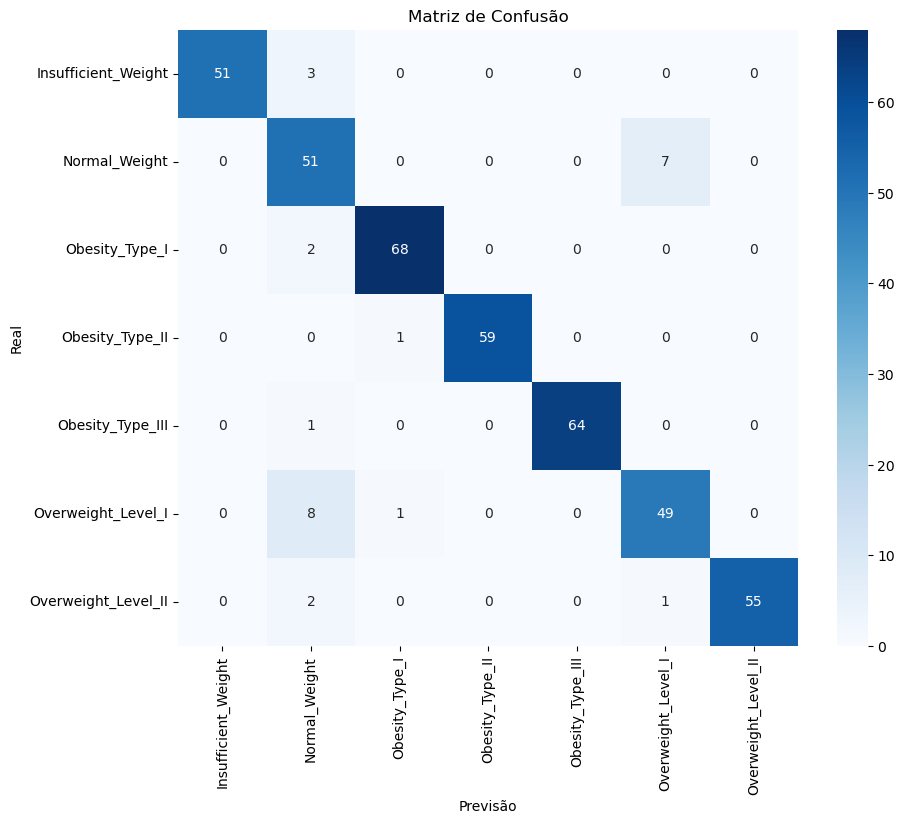

In [49]:
# Gerando a matriz de confusão
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Matriz de Confusão')
plt.xlabel('Previsão')
plt.ylabel('Real')
plt.show()


## Verificando a acurácia no treino e no teste



In [50]:
y_pred_train = model.predict(X_train)
print("Acurácia no treino:", accuracy_score(y_train, y_pred_train))

y_pred_test = model.predict(X_test)
print("Acurácia no teste:", accuracy_score(y_test, y_pred_test))

Acurácia no treino: 1.0
Acurácia no teste: 0.9385342789598109


Mesmo a acurácia de treino estando excelente. Ainda sim, optamos por ficar com esse modelo. Isso, porque, o teste deu um excelente resultado, mostrando que após aprender no treino, o modelo caiu apenas um percentual de 7 ao fazer a classificação nos dados novos. Além disse, após pequisar mais sobre o modelo de Random Forest entendemos que ele é, geralmente, muito bom em aprender os dados (considerando que esses dados sejam de qualidade - como são os dados do dataset). Logo entendemos que há um overfitting moderado no nosso modelo, mas que pode ser considerado acenitável.

## Validação Crusada

In [51]:
# Fazendo o Cross-Validation para validar o modelo
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(model, X_encoded, y_encoded, cv=5) # 5-fold cross-validation
print(f"\nAcurácia média do Cross-Validation: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")


Acurácia média do Cross-Validation: 0.9196 ± 0.0982


In [52]:
# Exibindo os nomes das variáveis utilizadas no treinamento
print("Variáveis utilizadas no treinamento:")
print(X_encoded.columns.tolist())

Variáveis utilizadas no treinamento:
['Gender', 'Age', 'Height', 'Weight', 'family_history', 'FAVC', 'FCVC', 'NCP', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CAEC_Frequently', 'CAEC_Sometimes', 'CAEC_no', 'CALC_Frequently', 'CALC_Sometimes', 'CALC_no', 'MTRANS_Bike', 'MTRANS_Motorbike', 'MTRANS_Public_Transportation', 'MTRANS_Walking']


### Lista das Variáveis utilizadas no treinamento:

['Gender', 'Age', 'Height', 'Weight', 'family_history', 'FAVC', 'FCVC', 'NCP', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CAEC_Frequently', 'CAEC_Sometimes', 'CAEC_no', 'CALC_Frequently', 'CALC_Sometimes', 'CALC_no', 'MTRANS_Bike', 'MTRANS_Motorbike', 'MTRANS_Public_Transportation', 'MTRANS_Walking']

## Exportando os arquivos para desenvolvimento da aplicação no Streamlit

In [53]:
import joblib

In [54]:
#Salvando o modelo
joblib.dump(model, 'random_forest_obesity_model.joblib')

['random_forest_obesity_model.joblib']

In [55]:
#Salvando a padronização
joblib.dump(scaler, 'scaler_obesity.joblib')

['scaler_obesity.joblib']

In [56]:
#Salvando o codificador de rótulos
joblib.dump(le, 'label_encoder_obesity.joblib')

['label_encoder_obesity.joblib']

In [57]:
#Salvando a lista de colunas
colunas_modelo = list(X_encoded.columns)
pd.Series(colunas_modelo).to_csv('colunas_modelo.csv', index=False)
